In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df=pd.read_csv('dementia_dataset.csv')
df = pd.DataFrame(df)


import warnings
warnings.filterwarnings('ignore')


df['Group']
df



,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [5]:
# COrrer uma vez ou dá erro
df.drop(['Subject ID', 'MRI ID'], axis = 1)

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [6]:
df['Group'].unique()


array(['Nondemented', 'Demented', 'Converted'], dtype=object)

In [7]:
# NOTA df1 será o dataset com os 3 valores. Posteriormente usar-se-á um dataset com apenas 2 valores: 
# Demented e Nondemented

df1 = df.replace('Nondemented', 0).replace('Demented', 1).replace('Converted', 2)
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,1,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,1,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,0,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,0,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [8]:
df1 = pd.get_dummies(df1)
df1

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,...,MRI ID_OAS2_0184_MR2,MRI ID_OAS2_0185_MR1,MRI ID_OAS2_0185_MR2,MRI ID_OAS2_0185_MR3,MRI ID_OAS2_0186_MR1,MRI ID_OAS2_0186_MR2,MRI ID_OAS2_0186_MR3,M/F_F,M/F_M,Hand_R
0,0,1,0,87,14,2.0,27.0,0.0,1987,0.696,...,0,0,0,0,0,0,0,0,1,1
1,0,2,457,88,14,2.0,30.0,0.0,2004,0.681,...,0,0,0,0,0,0,0,0,1,1
2,1,1,0,75,12,NaN,23.0,0.5,1678,0.736,...,0,0,0,0,0,0,0,0,1,1
3,1,2,560,76,12,NaN,28.0,0.5,1738,0.713,...,0,0,0,0,0,0,0,0,1,1
4,1,3,1895,80,12,NaN,22.0,0.5,1698,0.701,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,82,16,1.0,28.0,0.5,1693,0.694,...,0,0,1,0,0,0,0,0,1,1
369,1,3,2297,86,16,1.0,26.0,0.5,1688,0.675,...,0,0,0,1,0,0,0,0,1,1
370,0,1,0,61,13,2.0,30.0,0.0,1319,0.801,...,0,0,0,0,1,0,0,1,0,1
371,0,2,763,63,13,2.0,30.0,0.0,1327,0.796,...,0,0,0,0,0,1,0,1,0,1


In [9]:
df1['MR Delay']=(df1['MR Delay']-df1['MR Delay'].min())/(df1['MR Delay'].max()-df1['MR Delay'].min())
df1['EDUC']=(df1['EDUC']-df1['EDUC'].min())/(df1['EDUC'].max()-df1['EDUC'].min())
df1['MR Delay']=(df1['MR Delay']-df1['MR Delay'].min())/(df1['MR Delay'].max()-df1['MR Delay'].min())
df1['SES']=(df1['SES']-df1['SES'].min())/(df1['SES'].max()-df1['SES'].min())
df1['MMSE']=(df1['MMSE']-df1['MMSE'].min())/(df1['MMSE'].max()-df1['MMSE'].min())
df1['eTIV']=(df1['eTIV']-df1['eTIV'].min())/(df1['eTIV'].max()-df1['eTIV'].min())



df1

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,...,MRI ID_OAS2_0184_MR2,MRI ID_OAS2_0185_MR1,MRI ID_OAS2_0185_MR2,MRI ID_OAS2_0185_MR3,MRI ID_OAS2_0186_MR1,MRI ID_OAS2_0186_MR2,MRI ID_OAS2_0186_MR3,M/F_F,M/F_M,Hand_R
0,0,1,0.000000,87,0.470588,0.25,0.884615,0.0,0.981069,0.696,...,0,0,0,0,0,0,0,0,1,1
1,0,2,0.173172,88,0.470588,0.25,1.000000,0.0,1.000000,0.681,...,0,0,0,0,0,0,0,0,1,1
2,1,1,0.000000,75,0.352941,NaN,0.730769,0.5,0.636971,0.736,...,0,0,0,0,0,0,0,0,1,1
3,1,2,0.212202,76,0.352941,NaN,0.923077,0.5,0.703786,0.713,...,0,0,0,0,0,0,0,0,1,1
4,1,3,0.718075,80,0.352941,NaN,0.692308,0.5,0.659243,0.701,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,0.319060,82,0.588235,0.00,0.923077,0.5,0.653675,0.694,...,0,0,1,0,0,0,0,0,1,1
369,1,3,0.870405,86,0.588235,0.00,0.846154,0.5,0.648107,0.675,...,0,0,0,1,0,0,0,0,1,1
370,0,1,0.000000,61,0.411765,0.25,1.000000,0.0,0.237194,0.801,...,0,0,0,0,1,0,0,1,0,1
371,0,2,0.289125,63,0.411765,0.25,1.000000,0.0,0.246102,0.796,...,0,0,0,0,0,1,0,1,0,1


In [10]:
# Colunas com NaN values
df1.columns[df1.isna().any()].tolist() 


['SES', 'MMSE']

In [11]:
df1['SES'] = df1['SES'].fillna(df1['SES'].median())
df1['MMSE'] = df1['MMSE'].fillna(df1['MMSE'].median())
df1['Hand_R'] = df1['Hand_R'].fillna(0)

df1

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,...,MRI ID_OAS2_0184_MR2,MRI ID_OAS2_0185_MR1,MRI ID_OAS2_0185_MR2,MRI ID_OAS2_0185_MR3,MRI ID_OAS2_0186_MR1,MRI ID_OAS2_0186_MR2,MRI ID_OAS2_0186_MR3,M/F_F,M/F_M,Hand_R
0,0,1,0.000000,87,0.470588,0.25,0.884615,0.0,0.981069,0.696,...,0,0,0,0,0,0,0,0,1,1
1,0,2,0.173172,88,0.470588,0.25,1.000000,0.0,1.000000,0.681,...,0,0,0,0,0,0,0,0,1,1
2,1,1,0.000000,75,0.352941,0.25,0.730769,0.5,0.636971,0.736,...,0,0,0,0,0,0,0,0,1,1
3,1,2,0.212202,76,0.352941,0.25,0.923077,0.5,0.703786,0.713,...,0,0,0,0,0,0,0,0,1,1
4,1,3,0.718075,80,0.352941,0.25,0.692308,0.5,0.659243,0.701,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,0.319060,82,0.588235,0.00,0.923077,0.5,0.653675,0.694,...,0,0,1,0,0,0,0,0,1,1
369,1,3,0.870405,86,0.588235,0.00,0.846154,0.5,0.648107,0.675,...,0,0,0,1,0,0,0,0,1,1
370,0,1,0.000000,61,0.411765,0.25,1.000000,0.0,0.237194,0.801,...,0,0,0,0,1,0,0,1,0,1
371,0,2,0.289125,63,0.411765,0.25,1.000000,0.0,0.246102,0.796,...,0,0,0,0,0,1,0,1,0,1


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### SVM 

Accuracy: 76.79 %


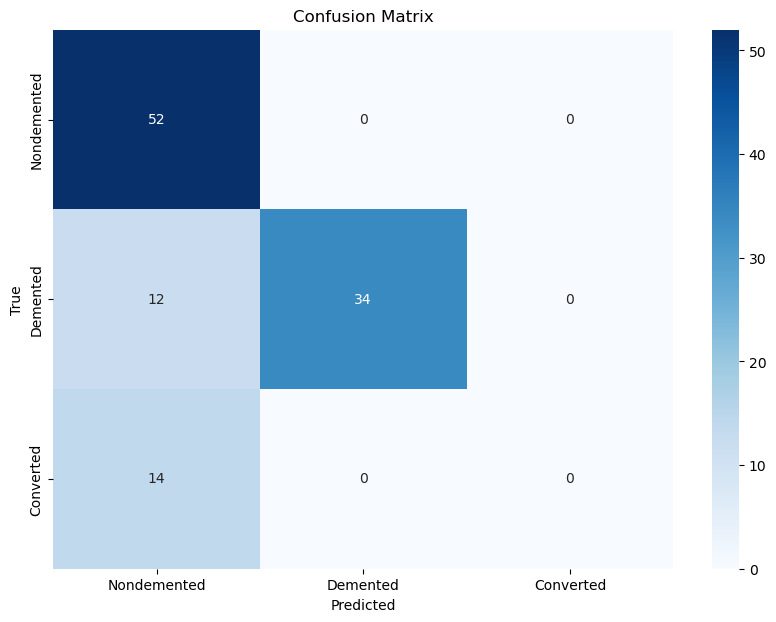

,precision,recall,f1-score,support
0,0.67,1.00,0.80,52.00
1,1.00,0.74,0.85,46.00
2,0.00,0.00,0.00,14.00
accuracy,0.77,0.77,0.77,0.77
macro avg,0.56,0.58,0.55,112.00
weighted avg,0.72,0.77,0.72,112.00


In [13]:



X = df1.drop(columns=['Group'])
y = df1['Group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# svm_model = SVC(kernel='linear', probability=True)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)


svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")

conf_matrix = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(10, 7)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented', 'Converted'], yticklabels=['Nondemented', 'Demented', 'Converted']) 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.title('Confusion Matrix') 
plt.show()
#############################################################################
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#############################################################################


report = classification_report(y_test, y_pred, output_dict=True) 
report_df = pd.DataFrame(report).transpose() 
def highlight_max(s): 
    is_max = s == s.max() 
    return ['background-color: yellow' if v else '' for v in is_max] 
styled_report = report_df.style.apply(highlight_max, subset=['precision', 'recall', 'f1-score']) 
styled_report.format(precision=2)

#############################################################################
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
#############################################################################



# One vs One model

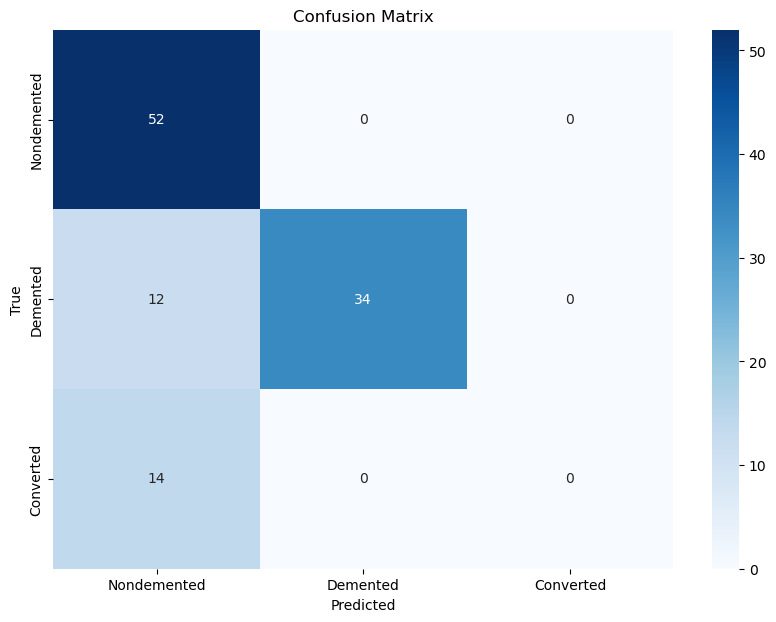

Accuracy: 0.7678571428571429

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        52
           1       1.00      0.74      0.85        46
           2       0.00      0.00      0.00        14

    accuracy                           0.77       112
   macro avg       0.56      0.58      0.55       112
weighted avg       0.72      0.77      0.72       112



In [16]:




import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Definir features (X) e target (y)
X = df1.drop(columns=['Group'])  # Use the correct target column name
y = df1['Group']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo SVM com One-vs-One
ovo_classifier = OneVsOneClassifier(SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))

# Treinar o modelo
ovo_classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = ovo_classifier.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented', 'Converted'], yticklabels=['Nondemented', 'Demented', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### Random Forest Model

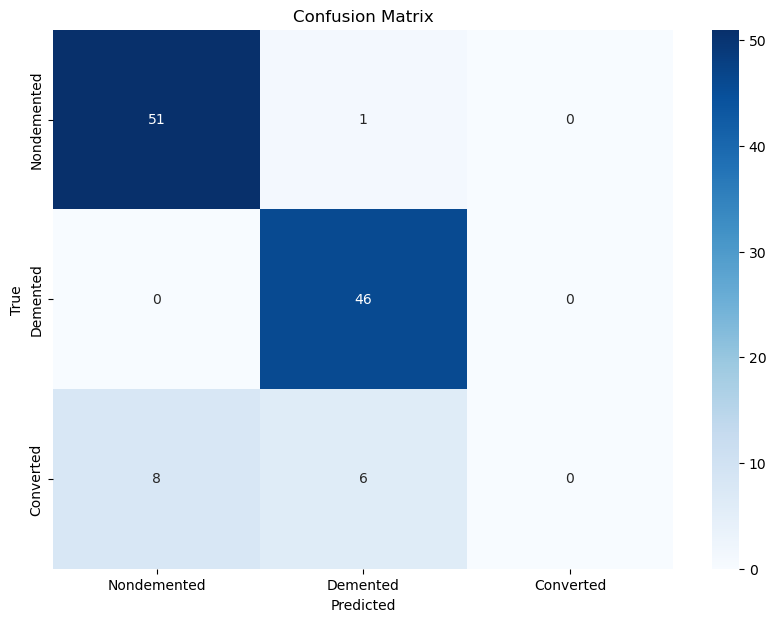

Accuracy: 0.8660714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92        52
           1       0.87      1.00      0.93        46
           2       0.00      0.00      0.00        14

    accuracy                           0.87       112
   macro avg       0.58      0.66      0.62       112
weighted avg       0.76      0.87      0.81       112



In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Definir features (X) e target (y)
X = df1.drop(columns=['Group'])  # Use o nome correto da coluna alvo
y = df1['Group']

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Nondemented', 'Demented', 'Converted'], yticklabels=['Nondemented', 'Demented', 'Converted'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


### ROC AUC Curve

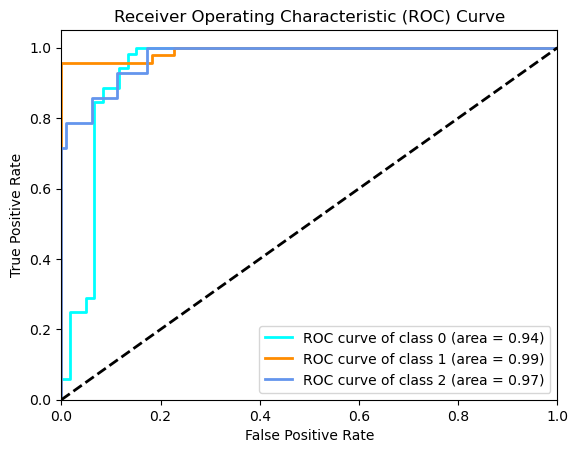

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier



# Definir features (X) e target (y)
X = df1.drop(columns=['Group'])
y = df1['Group']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model using one-vs-rest scheme
svm_model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
svm_model.fit(X_train, y_train)

# Compute the prediction probabilities
y_score = svm_model.decision_function(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Converted values are Nondemented, so we change converted to nondemented and we compare results